<a href="https://colab.research.google.com/github/HimanshuSahoo/Himanshu_Python/blob/main/Association_Rules_My_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=acf3a86ee2b6c7f1c744678150bc1da940c679c640256eeae892d07e76653f00
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
movies=pd.read_csv("my_movies.csv")

In [5]:
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [6]:
mo=movies.iloc[:,5:]
mo

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


## for whole dataset with support=0.1 , lift_thershold=0.8 and confi_threshold=0.9

 using apriori for determing support of itemsets (with min_support=0.1)

In [7]:
movie_itemsets1 = apriori(mo, min_support=0.1, use_colnames=True)
movie_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [8]:
# rules with min confidence of 0.9

In [9]:
confi_rules = association_rules(movie_itemsets1, metric="confidence", min_threshold=0.9)
confi_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(Sixth Sense, Harry Potter1)","(LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(LOTR2, Harry Potter1)","(Sixth Sense, LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(LOTR2, Green Mile)","(Sixth Sense, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [10]:
# Finding association rules wiht threshold of 0.8

In [11]:
rules1 = association_rules(movie_itemsets1, metric="lift", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
241,(LOTR1),"(LOTR2, Sixth Sense, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Sixth Sense),"(LOTR2, LOTR1, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
243,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [12]:
# Sorting the association rules with heighest lift ratio for top 10

In [13]:
rules1.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
208,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
103,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
209,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
207,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
133,"(Sixth Sense, Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
138,"(Gladiator, Green Mile)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf
139,"(Sixth Sense, LOTR)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
144,(LOTR),"(Sixth Sense, Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
197,"(Harry Potter1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
195,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [14]:
# Gathering the most effictive rules which have lift ratio greater than 1

In [15]:
r1=rules1[rules1.lift>1]
r1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
241,(LOTR1),"(LOTR2, Sixth Sense, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Sixth Sense),"(LOTR2, LOTR1, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
243,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [16]:
l=r1.pivot('antecedents','consequents','lift')
l.head()

consequents,(Sixth Sense),"(LOTR2, Green Mile)","(LOTR, Green Mile)","(Braveheart, Gladiator)","(Braveheart, Patriot)","(LOTR2, LOTR1)","(Sixth Sense, LOTR, Green Mile)","(Gladiator, LOTR, Green Mile)","(Sixth Sense, Gladiator, Green Mile)","(Sixth Sense, LOTR2, LOTR1, Green Mile)","(Sixth Sense, Gladiator, LOTR)",(Harry Potter1),"(LOTR1, Sixth Sense, Harry Potter1)","(LOTR2, LOTR1, Harry Potter1)","(LOTR2, Sixth Sense, Harry Potter1)",(Green Mile),"(Sixth Sense, LOTR1, Green Mile)","(LOTR2, LOTR1, Green Mile)","(LOTR2, Sixth Sense, Green Mile)","(LOTR2, Sixth Sense, LOTR1)","(LOTR2, Harry Potter1)","(Harry Potter1, Green Mile)","(LOTR1, Green Mile)","(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",(Gladiator),(Patriot),"(Sixth Sense, Harry Potter1, Green Mile)","(LOTR1, Harry Potter1, Green Mile)",(LOTR),(Braveheart),(LOTR1),"(Sixth Sense, Green Mile)",(Harry Potter2),(LOTR2),"(Sixth Sense, Gladiator)","(Patriot, Gladiator)","(Sixth Sense, LOTR)","(Gladiator, LOTR)","(Gladiator, Green Mile)","(Sixth Sense, LOTR1)","(LOTR1, Harry Potter1)","(Sixth Sense, Harry Potter1)","(LOTR2, Harry Potter1, Green Mile)","(LOTR2, Sixth Sense, Harry Potter1, Green Mile)","(LOTR2, LOTR1, Harry Potter1, Green Mile)","(LOTR2, Sixth Sense)","(Patriot, Sixth Sense)","(Sixth Sense, LOTR2, LOTR1, Harry Potter1)"
antecedents,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(Gladiator),1.190476,NaN,1.428571,NaN,1.428571,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,1.428571,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN
"(LOTR, Green Mile)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Gladiator)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR2, LOTR1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Vizualising rules with Heatmap for lift ratio

NameError: ignored

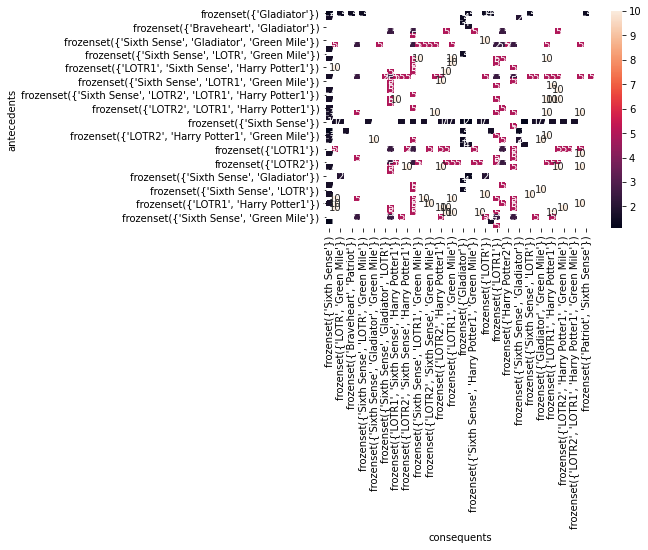

In [18]:
sns.heatmap(l,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [19]:
# Scatter plot for the associatioin rules with their confidence vs support

Text(0.5, 1.0, 'support vs confidence')

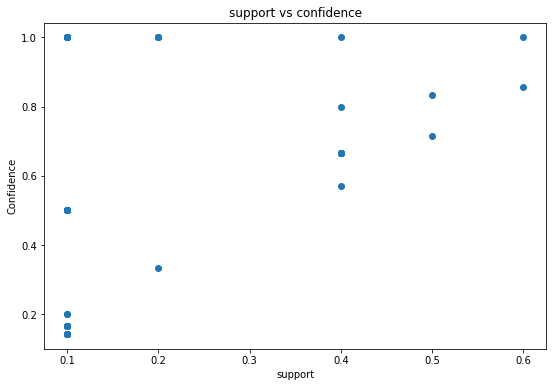

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 6))
sup=r1['support']
con=r1['confidence']
plt.scatter(sup,con)
plt.xlabel('support')
plt.ylabel('Confidence')
plt.title('support vs confidence')

## Association rules with support=0.15 and threshold=0.85 for whole dataset

In [21]:
movie_itemsets2 = apriori(mo, min_support=0.15, use_colnames=True)
movie_itemsets2


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Sixth Sense, Green Mile)"


In [22]:
rules2 = association_rules(movie_itemsets2, metric="lift", min_threshold=0.85)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [23]:
r2=rules2[rules2.lift>1]
r2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


## For movie dataset top 5 datapoints with support=0.2 and thershold=0.95

In [24]:
mo2=mo.head()
mo2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [25]:
movie_itemsets3 = apriori(mo2, min_support=0.2, use_colnames=True)
movie_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.6,(Gladiator)
2,0.4,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.4,(LOTR2)
6,0.2,(Braveheart)
7,0.2,(Green Mile)
8,0.4,"(Gladiator, Sixth Sense)"
9,0.2,"(Sixth Sense, LOTR1)"


In [26]:

rules3 = association_rules(movie_itemsets3, metric="lift", min_threshold=0.95)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
1,(Sixth Sense),(Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Sixth Sense),(Harry Potter1),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
191,(LOTR1),"(LOTR2, Sixth Sense, Harry Potter1, Green Mile)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
192,(Sixth Sense),"(LOTR2, LOTR1, Harry Potter1, Green Mile)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
193,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
194,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [27]:
r3=rules3[rules3.lift>1]
r3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
1,(Sixth Sense),(Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Sixth Sense),(Harry Potter1),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
191,(LOTR1),"(LOTR2, Sixth Sense, Harry Potter1, Green Mile)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
192,(Sixth Sense),"(LOTR2, LOTR1, Harry Potter1, Green Mile)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
193,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
194,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
